In [2]:
import scipy.linalg as linalg
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import operator
import pandas as pd
import ssaCore

%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)

Populating the interactive namespace from numpy and matplotlib


In [33]:
N = 300
L = 120 # Длинна гусеницы
K = N - L + 1 # Количество столбцов в траекторной матрице
t = np.arange(0,N)

In [34]:
trend = 0.08 * t
p1, p2 = 11, 8
periodic1 = 0.9 * np.sin(2*np.pi*t/p1)
periodic2 = 0.8 * np.sin(2*np.pi*(t+0.09)/p2)

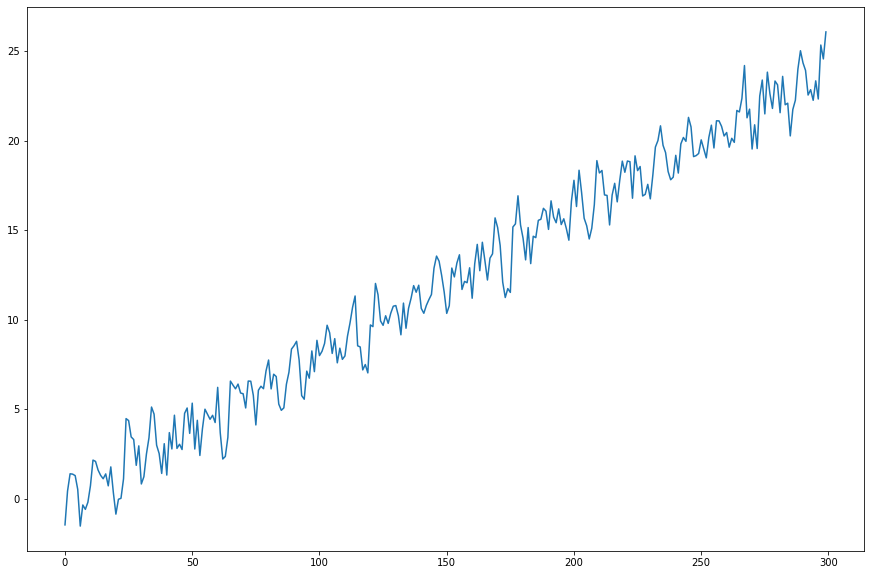

In [35]:
noise = np.random.normal(0, 0.8, N)

F = trend + periodic1 + periodic2 + noise
plt.plot(t, F)

In [36]:
ssa = ssaCore.SSA(F[0:200], L)

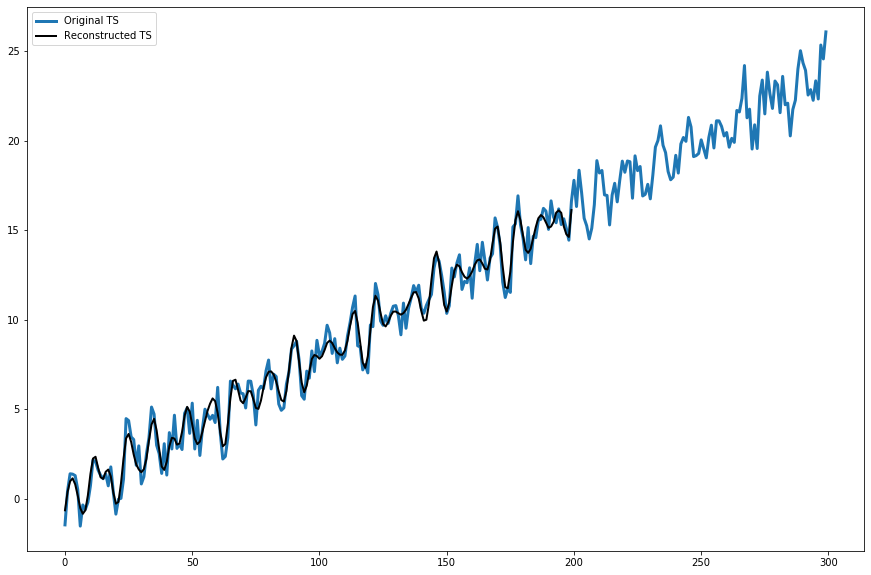

In [37]:


ssa.reconstruct()
tsReconstruct =  ssa.getFilt()
tsn = np.arange(len(tsReconstruct))
plt.plot(t, F, linewidth = 3, label = "Original TS")
plt.plot(tsn, tsReconstruct, color = "black", linewidth = 2, label = "Reconstructed TS")
plt.legend()



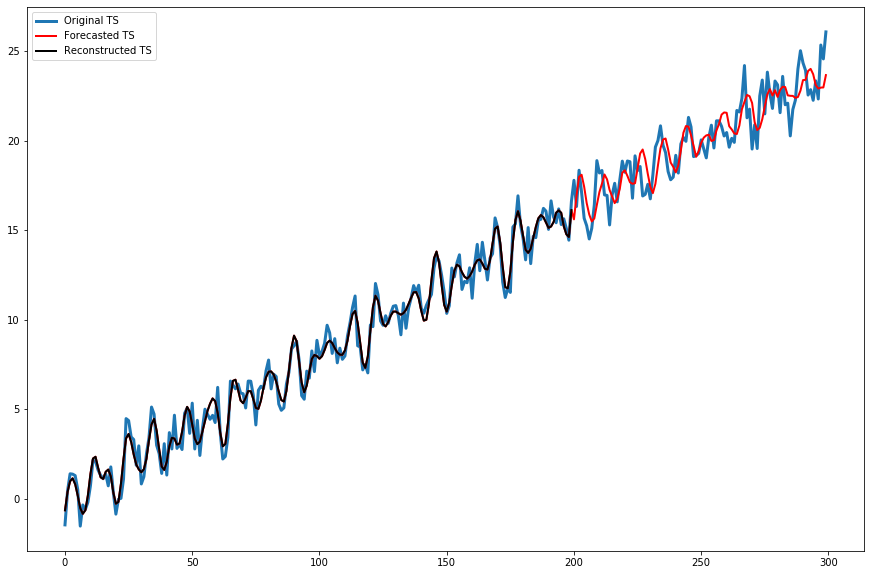

In [38]:
tsPredict = ssa.forecast(100)
tsn = np.arange(len(tsReconstruct))
plt.plot(t, F, linewidth = 3, label = "Original TS")
plt.plot(t, tsPredict, color = "red", linewidth = 2, label = "Forecasted TS")
plt.plot(tsn, tsReconstruct, color = "black", linewidth = 2, label = "Reconstructed TS")
plt.legend()